# OLAP style analysis

We have a fact table of laptops that gives the product price in Amazon and Walmart. Some dimensions in this table are brand, operating system, processor (cpu) manufacturer etc.

We now perform some olap-style analysis on the table.

In [2]:
import pandas as pd
import mlxtend
from collections import defaultdict
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import sys
import matplotlib.pyplot as plt

df = pd.read_csv('./data/merged_clean_numeric_v2.csv')
df.insert(0, 'id', range(0, len(df)))
df.drop(['product title'], axis=1).head()

,id,#a_id,w_id,amazon_price,walmart_price,brand,hard disk size,operating system,processor (cpu) manufacturer,processor count,processor speed,ram size,screen size
0,0,a0,w2300,1099.0,1136.09,Acer,256.0,Windows 10,Intel,4,3.8,16.0,15.6
1,1,a0,w2425,1099.0,1084.99,Acer,256.0,Windows 10,Intel,4,3.8,16.0,15.6
2,2,a0,w2479,1099.0,2487.44,Acer,256.0,Windows 10,Intel,4,3.8,16.0,15.6
3,3,a0,w2596,1099.0,997.49,Acer,256.0,Windows 10,Intel,4,3.8,16.0,15.6
4,4,a1002,w2733,1297.5,1358.27,HP,256.0,Windows 7,Intel,2,2.3,8.0,14.0


## Walmart vs. Amazon Pricing:

In [2]:
print('\tamazon_price\twalmart_price')
print ('Mean\t' +  str(df['amazon_price'].mean()) + '\t' + str(df['walmart_price'].mean()))

	amazon_price	walmart_price
Mean	1385.5805966930266	1571.5141073568175


**Observation 1: In general, prices are expensive in Walmart than in Amazon.**

In [3]:
print ('\nDrilling down by brand:')
print (df.groupby(['brand'])['amazon_price', 'walmart_price'].mean())


Drilling down by brand:
           amazon_price  walmart_price
brand                                 
AORUS       2299.000000    2199.000000
Acer         487.122361     509.250694
Alienware   1785.146316    1714.692632
Aorus       2199.000000    2099.000000
Apple       1118.584123     729.805614
Asus         994.911304     864.117681
Bit          214.990000     179.000000
CTL          292.970000     264.810000
Dell         740.719229     692.582207
HP           928.033926    1066.269453
Huawei       689.280000     662.200000
LG          1247.030500     894.477000
Lenovo      1672.351025    2018.848058
MSI         1363.211951    1352.693659
Microsoft   2542.027500    2071.745000
OMEN        3599.000000    3563.950000
Panasonic   1224.791250     728.715000
Prostar     1318.549763    1217.438270
Razer       1604.247500    1790.990000
SLIDE        224.990000     224.990000
Samsung      972.627778     780.921111
Toshiba     1322.960000    1319.400000
VIZIO        979.990000     364.495000


**Observation 2: But if we drill down on the prices, using a particular brand, then we find that for a few brands like Apple, Alienware, Asus, Dell, etc., Amazon is pricier.**

## Analysis by Brand:

In [4]:
df.insert(len(df.columns), 'average_price', (df['amazon_price'] + df['walmart_price'])/2.0)
temp = (df['average_price'])
temp = list(map(int, temp))
temp = [str(int(i/500)*500) + '-' + str(int(i/500)*500 + 500) for i in temp]
df.insert(len(df.columns), 'average_price_range', temp)

In [5]:
filtered = df.groupby(['brand']).filter(lambda x: len(x) >= 100)
filtered.groupby(['brand', 'average_price_range'])['id'].count()

brand    average_price_range
Acer     0-500                    87
         1000-1500                 8
         1500-2000                 2
         500-1000                 47
Apple    0-500                     1
         1000-1500                27
         1500-2000                 6
         2000-2500                 2
         500-1000                 78
Dell     0-500                    71
         1000-1500                52
         1500-2000                 8
         2000-2500                 2
         500-1000                243
HP       0-500                    89
         1000-1500               248
         1500-2000                46
         2000-2500                 4
         500-1000                125
Lenovo   0-500                    39
         1000-1500                66
         1500-2000              1592
         2000-2500               478
         2500-3000               133
         3000-3500                 2
         500-1000                100
Prostar  



**Observation 3: If we look at the average price range, Lenevo has a lot of products whose price > 1500$**


In [6]:
print (df.groupby(['brand'])['id'].count())

brand
AORUS           1
Acer          144
Alienware      19
Aorus           1
Apple         114
Asus           69
Bit             2
CTL             1
Dell          376
HP            512
Huawei          1
LG             20
Lenovo       2410
MSI            41
Microsoft       4
OMEN            2
Panasonic       8
Prostar       422
Razer           4
SLIDE           1
Samsung        18
Toshiba         1
VIZIO           2
Name: id, dtype: int64


**There a lot of Lenevo products in our database.**

In [7]:
print (df[df['brand'] =="Lenovo"].groupby(['operating system'])['id'].count())

operating system
Chrome          26
WINDOWS 10       1
Windows 10    2163
Windows 7      215
Windows 8        5
Name: id, dtype: int64


**Observation 4: Most of the Lenevo products in our database have Windows 10 as their operating systems**

## Analysis by RAM size:

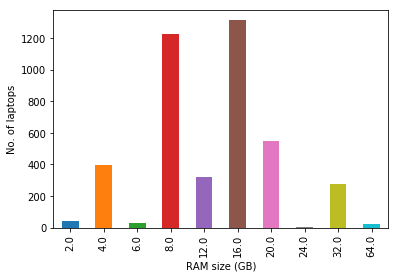

In [8]:
xx = df.groupby(['ram size'])['average_price'].mean()
df.groupby(['ram size'])['id'].count().plot(kind='bar')
plt.xlabel('RAM size (GB)')
plt.ylabel('No. of laptops')
plt.show()

**Observation 5: RAM sizes of 8GB and 16GB are most popular.**

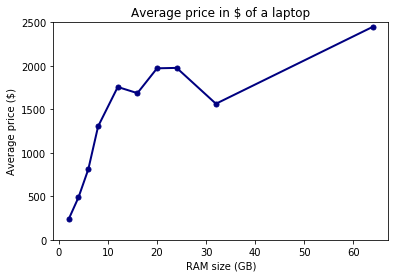

In [9]:
xx.plot(lw=2, colormap='jet', marker='.', markersize=10,
         title='Average price in $ of a laptop')
plt.xlabel('RAM size (GB)')
plt.ylabel('Average price ($)')
plt.ylim((0,2500))
plt.show()

**Observation 6: As the RAM size increases, the average price of a laptop increases.**

## Analysis by Hard disk size:

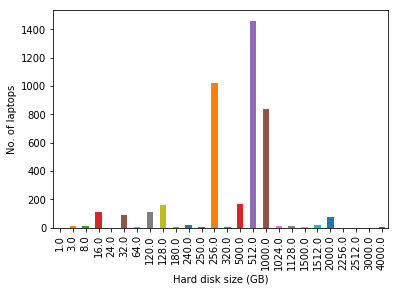

In [10]:
temp = (df['hard disk size'])
temp = list(map(int, temp))
temp = [str(int(i/256)*256) + '-' + str(int(i/256)*256 + 256) for i in temp]
df.insert(len(df.columns), 'hard disk size range', temp)
yy = (df.groupby(['hard disk size'])['id'].count())
yy.plot(kind='bar')
plt.xlabel('Hard disk size (GB)')
plt.ylabel('No. of laptops')
plt.show()

**Observation 7: Hard disk sizes of 256GB, 512GB, and 1TB are most popular.**

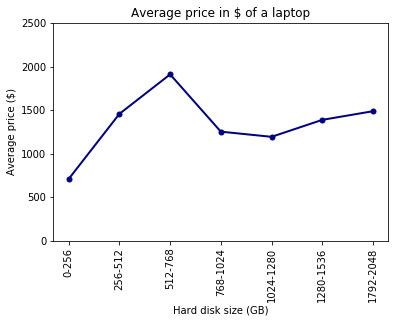

In [11]:
filtered = df.groupby(['hard disk size range']).filter(lambda x: len(x) >= 10)
size_order = ["0-256", "256-512", "512-768", "768-1024", "1024-1280", "1280-1536", "1792-2048"]
xx = filtered.groupby(['hard disk size range'])['average_price'].mean().sort_index().loc[size_order]
ax= xx.plot(lw=2, colormap='jet', marker='.', markersize=10,
         title='Average price in $ of a laptop')
ax.set_xticklabels(["", "0-256", "256-512", "512-768", "768-1024", "1024-1280", "1280-1536", "1792-2048"], rotation=90)
plt.xlabel('Hard disk size (GB)')
plt.ylabel('Average price ($)')
plt.ylim((0,2500))
plt.show()

**Observation 8: There is no obvious trend in the price of a laptop with the increase in hard disk size. A peak at 512GB could be due to the 512GB hard disks being SSDs instead of HDDs.**

## Analysis by Processor counts and speed:

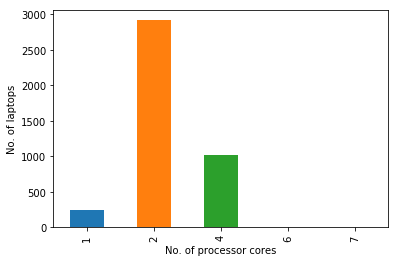

In [12]:
yy = (df.groupby(['processor count'])['id'].count())
yy.plot(kind='bar')
plt.xlabel('No. of processor cores')
plt.ylabel('No. of laptops')
plt.show()

**Observation 9: Dual core processors are most popular.**

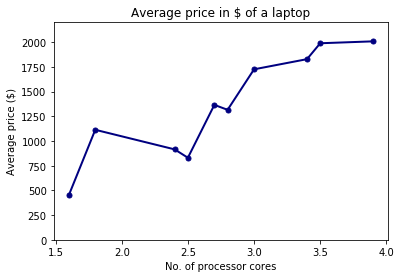

In [13]:
xx = df.groupby(['processor speed']).filter(lambda x: len(x) >= 100).groupby(['processor speed'])['average_price'].mean().sort_index()
ax= xx.plot(lw=2, colormap='jet', marker='.', markersize=10,
         title='Average price in $ of a laptop')
plt.xlabel('No. of processor cores')
plt.ylabel('Average price ($)')
plt.ylim((0,2200))
plt.show()

**Observation 10: There is an increase in the price of a laptop with the increase in the processor speed.**